In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from helpers import preproc_material

#### 1. OneHotEncoding

In [205]:
data = pd.read_csv('clear_data.csv', index_col=[0])
data.head()

,temperature_1,time_1,temperature_2,time_2,base,m_salt_2,name_salt1,name_salt2,volume_solvent,density,structure,capacity
0,90,12.0,400.0,3.0,urea,1.0,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,280.0,20.0,urchin-like,295.0
1,90,12.0,400.0,3.0,urea,1.0,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,280.0,30.0,urchin-like,250.0
2,90,12.0,400.0,3.0,urea,1.0,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,280.0,40.0,urchin-like,237.0
3,90,12.0,400.0,3.0,urea,1.0,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,280.0,60.0,urchin-like,225.0
4,140,12.0,300.0,3.0,urea,1.0,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,20.0,1.0,nanorods,710.0


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature_1   75 non-null     int64  
 1   time_1          75 non-null     float64
 2   temperature_2   74 non-null     float64
 3   time_2          74 non-null     float64
 4   base            73 non-null     object 
 5   m_salt_2        75 non-null     float64
 6   name_salt1      75 non-null     object 
 7   name_salt2      75 non-null     object 
 8   volume_solvent  74 non-null     float64
 9   density         75 non-null     float64
 10  structure       75 non-null     object 
 11  capacity        75 non-null     float64
dtypes: float64(7), int64(1), object(4)
memory usage: 7.6+ KB


In [199]:
# capacity predict
y = data.capacity
y_class = data.structure
x = data.drop(['capacity', 'structure'], axis=1)

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error

In [274]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x)
x = enc.transform(x).toarray()

In [275]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)

In [301]:
from xgboost import XGBRegressor

In [276]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_xgb = xgb.predict(X_test)
np.sqrt(mean_squared_error(y_xgb, y_test))

311.4288229349171

In [277]:
forest = RandomForestRegressor(n_estimators = 3000, max_depth = 25, random_state = 19)
forest.fit(X_train, y_train)

y_forest = forest.predict(X_test)
np.sqrt(mean_squared_error(y_forest, y_test))

384.46206593982396

#### 2. Morgan finger print

In [200]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pubchempy as pcp

In [312]:
def mol_name_to_smiles(name: str):
    return pcp.get_compounds(name, 'name')[0].isomeric_smiles


def smiles_to_mol(smi):
    return Chem.MolFromSmiles(smi)


def morgan_fingerprint(smi):
    mol = smiles_to_mol(smi)
    return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, useChirality=True, radius=2, nBits=100))

In [487]:
# for elem in ['name_salt1', 'name_salt2', 'base']:
#     data[elem] = data[elem].apply(lambda x: morgan_fingerprint(mol_name_to_smiles(x)))
# #     data = data.drop([elem], axis=1)

In [238]:
data.columns

Index(['temperature_1', 'time_1', 'temperature_2', 'time_2', 'base',
       'm_salt_2', 'name_salt1', 'name_salt2', 'volume_solvent', 'density',
       'structure', 'capacity'],
      dtype='object')

In [209]:
fp_1 = []
fp_2 = []
fp_3 = []
for elem in ['name_salt1', 'name_salt2', 'base']:
    for i in range(data.shape[0]):
        row = data.iloc[0][elem]
        if elem == 'name_salt1':
            fp_1.append(morgan_fingerprint(mol_name_to_smiles(row)))
        if elem == 'name_salt2':
            fp_2.append(morgan_fingerprint(mol_name_to_smiles(row)))
        if elem == 'base':
            fp_3.append(morgan_fingerprint(mol_name_to_smiles(row)))

Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(II) nitrate hexahydrate
Nickel(I

In [253]:
data = data.drop(['name_salt1', 'name_salt2', 'base'], axis=1)

In [254]:
preproc_data = pd.concat([data, pd.DataFrame(fp_1)], axis=1)
preproc_data = pd.concat([preproc_data, pd.DataFrame(fp_2, columns=range(100, 200))], axis=1)
preproc_data = pd.concat([preproc_data, pd.DataFrame(fp_3, columns=range(200, 300))], axis=1)

In [256]:
preproc_data

,temperature_1,time_1,temperature_2,time_2,m_salt_2,volume_solvent,density,structure,capacity,0,...,290,291,292,293,294,295,296,297,298,299
0,90,12.0,400.0,3.0,1.000000,280.0,20.0,urchin-like,295.0,0,...,0,0,0,0,0,0,0,0,0,0
1,90,12.0,400.0,3.0,1.000000,280.0,30.0,urchin-like,250.0,0,...,0,0,0,0,0,0,0,0,0,0
2,90,12.0,400.0,3.0,1.000000,280.0,40.0,urchin-like,237.0,0,...,0,0,0,0,0,0,0,0,0,0
3,90,12.0,400.0,3.0,1.000000,280.0,60.0,urchin-like,225.0,0,...,0,0,0,0,0,0,0,0,0,0
4,140,12.0,300.0,3.0,1.000000,20.0,1.0,nanorods,710.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,180,10.0,350.0,3.5,0.008658,35.0,1.0,nanosheets,558.6,0,...,0,0,0,0,0,0,0,0,0,0
71,180,10.0,350.0,3.5,0.008658,35.0,1.0,nanosheets,484.6,0,...,0,0,0,0,0,0,0,0,0,0
72,180,10.0,350.0,3.5,0.008658,35.0,1.0,nanosheets,955.0,0,...,0,0,0,0,0,0,0,0,0,0
73,180,10.0,350.0,3.5,0.008658,35.0,1.0,nanoflowers,368.0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
y_class_fp = preproc_data.structure
y = preproc_data.capacity

In [279]:
x = preproc_data.drop(['capacity', 'structure'], axis=1)

In [280]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=100)

In [410]:
xgb_fp = XGBRegressor()
xgb_fp.fit(X_train, y_train)

y_xgb_fp = xgb_fp.predict(X_test)
np.sqrt(mean_squared_error(y_xgb_fp, y_test))

265.49639556718125

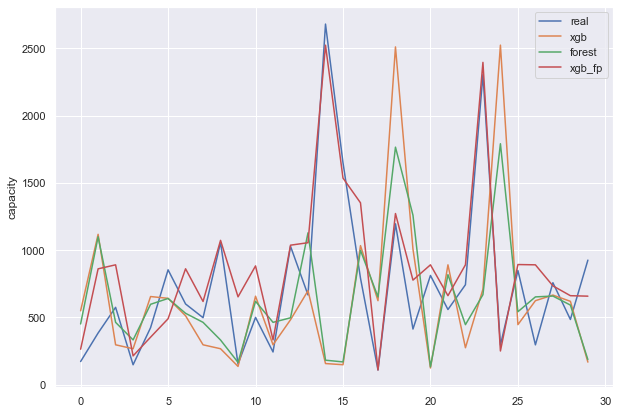

In [411]:
plt.rcParams["figure.figsize"] = (10, 7)
sns.set(style="darkgrid")

sns.lineplot(x=range(len(y_test)), y=y_test, label='real')
sns.lineplot(x=range(len(y_test)), y=y_xgb, label='xgb')
sns.lineplot(x=range(len(y_test)), y=y_forest, label='forest')
# sns.lineplot(x=range(len(y_test)), y=y_cat, label='cat')
sns.lineplot(x=range(len(y_test)), y=y_xgb_fp, label='xgb_fp')
plt.legend()

In [412]:
import plotly.express as px

In [295]:
res = pd.DataFrame()

In [466]:
models = {'xgb' : y_xgb, 'real' : y_test, 'forest' : y_forest, 'xgb_fp' : y_xgb_fp,
    
}
for name, result in models.items():
    curr_res = []
    for i, r in enumerate(result):
        res = res.append({'it': i, 'model' : name, 'capacity' : r}, ignore_index=True)       

In [468]:
res[res.model == 'real'].capacity

0       549.268799
1      1117.860229
2       296.381958
3       267.005402
4       655.191406
          ...     
175     849.000000
176     296.000000
177     758.000000
178     484.600000
179     926.000000
Name: capacity, Length: 150, dtype: float64

In [292]:
fig = px.line(res, x='it', y='capacity', color='model', title = 'Точность модели')
fig.show()

### Загрузка и предикт

In [444]:
tmp = [100, 2, 350, 4, 2, 20, 10, 'urea', 'Nickel(II) nitrate hexahydrate', 'Nickel(II) nitrate hexahydrate']

In [439]:
# tmp = ['temperature_1', 'time_1', 'temperature_2', 'time_2', 'base',
#        'm_salt_2', 'name_salt1', 'name_salt2', 'volume_solvent', 'density']

In [456]:
tmp[7:]

['urea', 'Nickel(II) nitrate hexahydrate', 'Nickel(II) nitrate hexahydrate']

In [451]:
def preproc(tmp):
    descriptors = []
    for i in tmp[7:]:
        descriptors.extend(morgan_fingerprint(mol_name_to_smiles(i)))
    preproc_tmp = tmp[:7]
    preproc_tmp = dict(zip(['temperature_1', 'time_1', 'temperature_2', 'time_2',
        'm_salt_2', 'volume_solvent', 'density'], preproc_tmp))
    print(preproc_tmp)
    for i, d in enumerate(descriptors):
        preproc_tmp[str(i)] = d
    return preproc_tmp
        
        

In [452]:
pr = pd.DataFrame(preproc(tmp), index=[0])

{'temperature_1': 100, 'time_1': 2, 'temperature_2': 350, 'time_2': 4, 'm_salt_2': 2, 'volume_solvent': 20, 'density': 10}


In [453]:
import pickle
file_name = "xgb_fp.pkl"

# save
pickle.dump(xgb_fp, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [454]:
xgb_model_loaded.predict(pr)

array([585.18823], dtype=float32)